# 🏡 California Housing Price Prediction

## 1. Introduction
The goal of this project is to predict California housing prices using different regression models:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regressor  

We will compare their performance using two evaluation metrics:
- **MSE (Mean Squared Error)**  
- **R² (Coefficient of Determination)**  


## 2. Data Loading & Exploration


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

print("Dataset shape:", X.shape)
print("Target length:", len(y))

# Print feature names
print("\nFeature attributes:")
for i, feature in enumerate(california.feature_names):
    print(f"{i+1}. {feature}")

# Show first 5 rows
X.head()

Dataset shape: (20640, 8)
Target length: 20640

Feature attributes:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 3. Data Preprocessing
We split the dataset into **training** and **testing** sets (80/20).  
For linear models (Linear, Ridge, Lasso), we standardize the features.  
Tree-based models like Random Forest do not require scaling.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization (only needed for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Training
We will train four regression models:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regressor

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df

,MSE,R²
Linear Regression,0.555892,0.575788
Ridge Regression,0.555855,0.575816
Lasso Regression,0.679629,0.481361
Random Forest,0.255368,0.805123


## 5. Results Visualization
We compare models using **R² scores** and visualize the results.

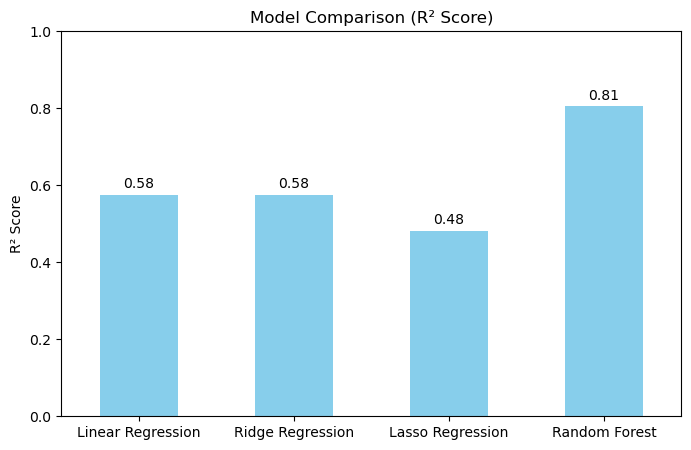

In [7]:
plt.figure(figsize=(8,5))
ax = results_df["R²"].plot(kind="bar", color="skyblue")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
# Add value labels on top of bars
for i, v in enumerate(results_df["R²"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.show()

## 6. Random Forest: Actual vs Predicted
We take Random Forest (the best model) and compare predicted values vs actual values.

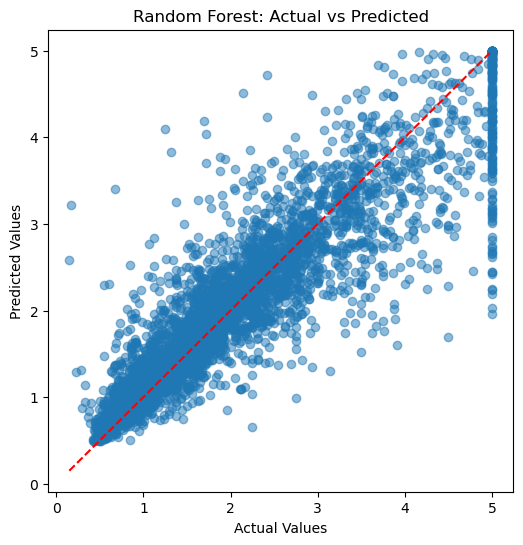

In [8]:
rf = models["Random Forest"]
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

## 7. Feature Importance (Random Forest)
We check which features contribute the most to housing price prediction.

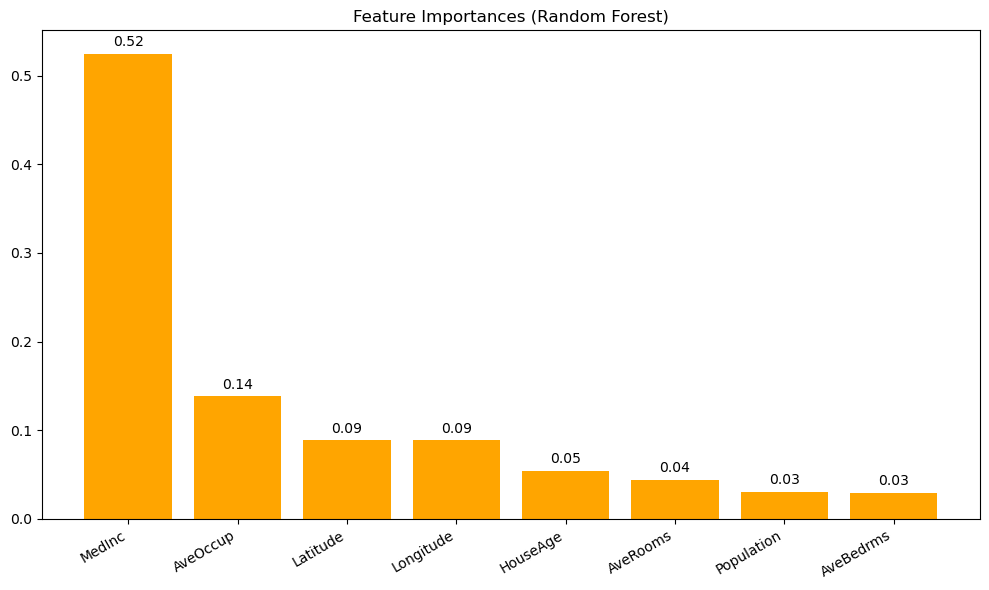

In [10]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color="orange")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=30, ha="right")

# Add values above bars
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.005, f"{v:.2f}", ha="center", va="bottom")

plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

## 8. Conclusion
- **Linear Models** (Linear, Ridge, Lasso) achieved R² scores around ~0.5–0.6.  
- **Random Forest** performed significantly better, with R² ≈ 0.80,  
  showing it captures non-linear relationships in the data.  
- **Feature Importance** shows that *Median Income* is the most influential factor,  
  followed by *Latitude* and *Longitude*.  

👉 Regression was chosen because the target variable (house price) is **continuous**,  
making regression models more appropriate than classification models.  